Perform hypothesis tests on questions identified in Stage III. (30 points)
* e.x. Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.
you can also make 3 new hypotheses and do hypothesis tests on them.
Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing.

For each of the aforemention analysis plot figures, the figures should include (10 points)
- trend line (based on the datasets from 2020.06.01 (Monday) to 2021.01.03 (Sunday)).
- prediction path (forecast 1 week).
- confidence intervals (error in prediction). (Further materials you may need to explore: https://lmc2179.github.io/posts/confidence_prediction.html; https://www.geeksforgeeks.org/how-to-plot-a-confidence-interval-in-python/)

# Single State Models

### Imports

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #?????????????
import plotly.express as px
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.metrics import root_mean_squared_error
from seaborn import regplot
import scipy.stats as stats

total_cc = pd.read_csv('covid_cases_weekly.csv', index_col=0)
total_cd = pd.read_csv('covid_deaths_weekly.csv', index_col=0)  #Importing

### Focusing scope

In [505]:
vermont_cases = total_cc[total_cc['State'] == 'VT']
vermont_deaths = total_cd[total_cd['State'] == 'VT'] #My state is Vermont

Total_Vermont_CC = vermont_cases[vermont_cases.columns[5:]].sum()
Total_Vermont_CD = vermont_deaths[vermont_deaths.columns[5:]].sum()  #Sum of cases/deaths

#Focusing on cases

vermont_new_cases = Total_Vermont_CC.diff()[1:]
vermont_new_deaths = Total_Vermont_CD.diff()[1:]

### Linear Regression

In [507]:
x = np.arange(len(vermont_new_cases)) * 7  #Prepping for linear regressions
c_linear = LinearRegression()
d_linear = LinearRegression()
reshape = lambda a: a.copy().reshape(-1, 1)

c_linear.fit(reshape(x), vermont_new_cases)
d_linear.fit(reshape(x), vermont_new_deaths)  #Fit for linear regression

LinearRegression()

In [495]:
x_ext = np.arange(len(vermont_new_cases) + 1) * 7  #Reshaping with prediction
c_prediction = c_linear.predict(reshape(x))
d_prediction = d_linear.predict(reshape(x))

In [514]:
cpoly_lin = polyfit(x, vermont_new_cases, 1)
dpoly_lin = polyfit(x, vermont_new_deaths, 1)

cpoly_pred_lin = polyval(x, cases_linear)
dpoly_pred_lin = polyval(x, deaths_linear)

## Predictions and Plotting

### Cases Prediction - Linear

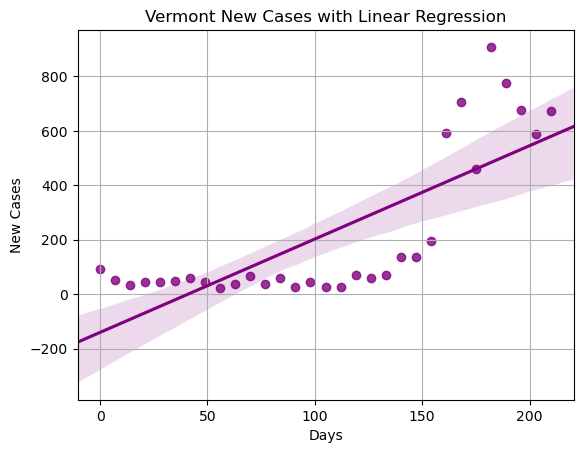

In [497]:
ax = regplot(vermont_new_cases, x=x, y=vermont_new_cases, label='Cases', truncate=False, color="purple")
ax.set_title('Vermont New Cases with Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

### Deaths Prediction - Linear

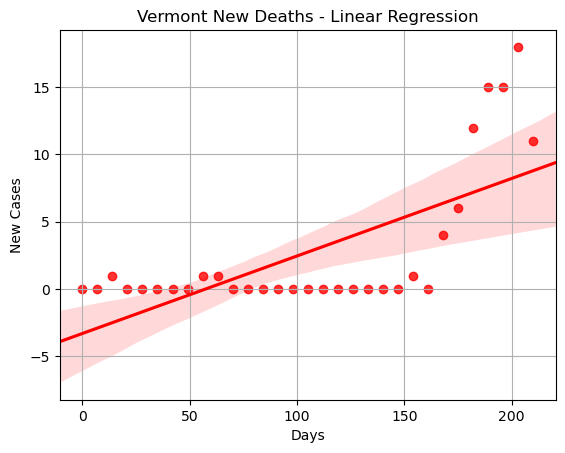

In [499]:
x = regplot(vermont_new_deaths, x=x, y=vermont_new_deaths, label='Deaths', truncate=False, color="red")  #PLotting
x.set_title('Vermont New Deaths - Linear Regression')
x.set_xlabel('Days')
x.set_ylabel('New Cases')
plt.grid()
plt.show()


## Non-Linear Regression

In [516]:
cases_nl = polyfit(x, vermont_new_cases, 2)
deaths_nl = polyfit(x, vermont_new_deaths, 2)

cases_pred_nl = polyval(x, cases_nl)
deaths_pred_nl = polyval(x, deaths_nl)

### Cases Prediction - Non-Linear

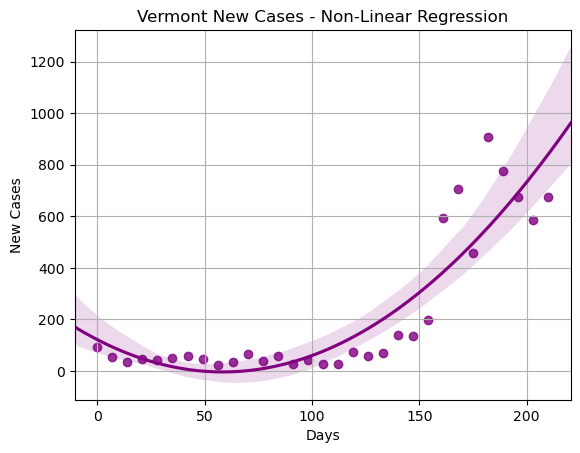

In [519]:
ax = regplot(vermont_new_cases, x=x, y=vermont_new_cases, order=2, label='Trendline', truncate=False, color="purple")
ax.set_title('Vermont New Cases - Non-Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

### Deaths Prediction - Non-Linear

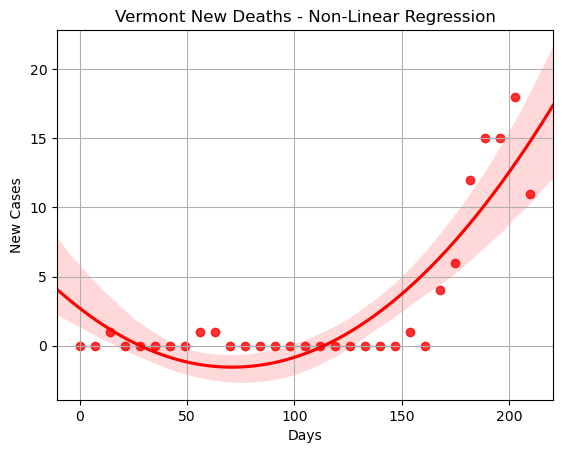

In [521]:
ax = regplot(vermont_new_deaths, x=x, y=vermont_new_deaths, order=2, label='Trendline', truncate=False, color="red")
ax.set_title('Vermont New Deaths - Non-Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

### RMSE Comparison

In [525]:
linear_cases_rmse = root_mean_squared_error(vermont_new_cases, cpoly_pred_lin)
linear_deaths_rmse = root_mean_squared_error(vermont_new_deaths, dpoly_pred_lin)

nl_cases_rmse = root_mean_squared_error(vermont_new_cases, cases_pred_nl)
nl_deaths_rmse = root_mean_squared_error(vermont_new_deaths, deaths_pred_nl)

rmse_data = {
    'Model': ['Linear', 'Non-Linear'],
    'Cases RMSE': [linear_cases_rmse, nl_cases_rmse],
    'Deaths RMSE': [linear_deaths_rmse, nl_deaths_rmse]
}

rmse_df = pd.DataFrame(rmse_data).set_index('Model')
rmse_df

,Cases RMSE,Deaths RMSE
Model,,
Linear,174.780290,3.843314
Non-Linear,118.229997,2.439675


## Top 5 Counties in Vermont
Model for top 5 counties with cases within a state and describe their trends. (10 points)

In [ ]:
#total_cc
#total_cd

last_week = cases.columns[-1]
top_5_counties = florida_cases.sort_values(by=last_week, ascending=False).set_index('County Name').drop(columns=['countyFIPS'])
top_5_counties = top_5_counties.head(5)
top_5_counties

In [302]:
enrichment = pd.read_csv('enrichment.csv', index_col=0)